In [1]:
!python --version

Python 3.9.7


`Librerias`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt

from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')

In [3]:
sharks = pd.read_csv('clean_sharks_attacks.csv', encoding='unicode_escape')
pd.set_option('display.max_columns',None)

----------------------------

`Hipótesis 1`

Tras realizar la manipulación y limpieza de los datos, perderemos aproximadamente el 40% de los registros.

In [4]:
shape_inicial=(25723, 24)
sharks.shape

loss_data=round((1-(sharks.shape[0]/shape_inicial[0]))*100,2)

shape_inicial[0]
print(f'''Inicialmente teníamos {shape_inicial[0]} registros y {shape_inicial[1]} campos/columnas. \n
Tras la limpieza y la manipulación de datos nos hemos quedado con {sharks.shape[0]} registros y {sharks.shape[1]} campos/columnas. \n
En cuanto a registros hemos perdido un {loss_data}% de registros.''')

Inicialmente teníamos 25723 registros y 24 campos/columnas. 

Tras la limpieza y la manipulación de datos nos hemos quedado con 3217 registros y 10 campos/columnas. 

En cuanto a registros hemos perdido un 87.49% de registros.


Como podemos observar nuestra `hipótesis es errónea`, ya que nuestra pérdida es significativamente superior.

-----------------------------

`Hipótesis 2`

Se considera que los países con mayor extensión de costa con los que tendrán con mayor proababilidad el mayor número de ataques:

- Estados Unidos
- Australia
- Brasil

Se descartan países como Canadá y Rusia ya que la mayor parte de su coste se encuentra en latitudes extremas, donde la presencia de tiburones es nula o practicamente nula.

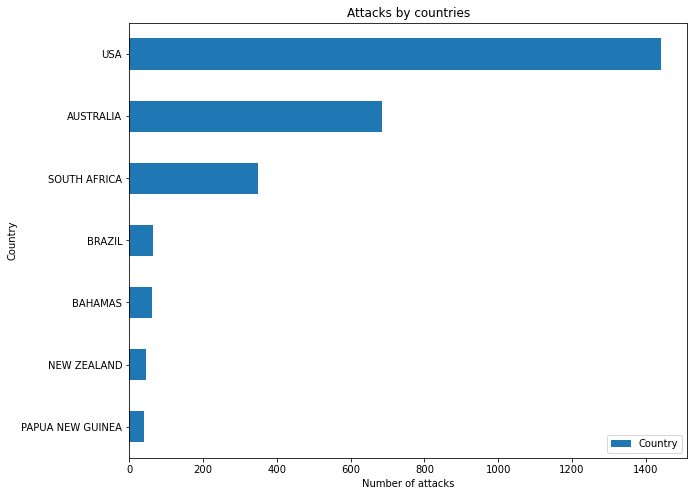

In [5]:
plt.figure(figsize=(10,8))
sharks['Country'].value_counts().head(7).sort_values().plot(kind='barh')
plt.ylabel("Country")
plt.xlabel("Number of attacks")
plt.title('Attacks by countries')
plt.legend()
plt.savefig("plots/Attacks_by_country.jpg",bbox_inches='tight')
plt.show()

-----------------------------

De los tres países con más ataques. ¿Qué `porcentaje de letalidad` tiene cada uno de ellos?

`USA - ESTADOS UNIDOS`

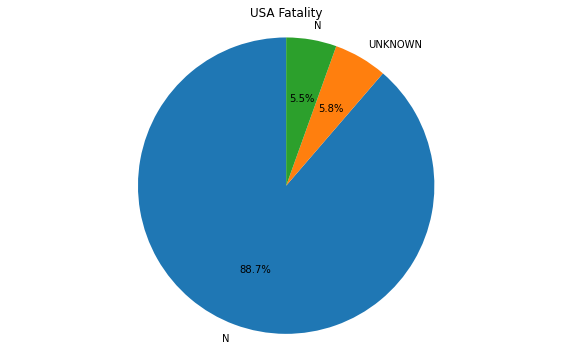

La probabilidad de que un ataque sea letal en USA es de 6.19% 

Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos


In [6]:
N_label_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts().index[0]
U_label_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts().index[1]
Y_label_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts().index[2]

N_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts()[0]
U_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts()[1]
Y_USA=sharks[sharks['Country']=='USA']['Fatal (y/n)'].value_counts()[2]

data = [N_USA, U_USA, Y_USA]
label = [N_label_USA, U_label_USA, N_label_USA]

plt.figure(figsize=(10,6))
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('USA Fatality')
plt.axis('equal')
plt.savefig("plots/USA_Fatality.jpg",bbox_inches='tight')
plt.show()

print(f'La probabilidad de que un ataque sea letal en USA es de {round(Y_USA/N_USA*100,2)}% \n')
print('Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos')

`AUSTRALIA`

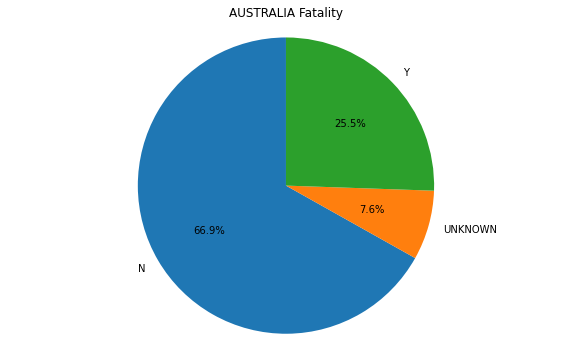

La probabilidad de que un ataque sea letal en AUSTRALIA es de 38.21% 

Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos


In [7]:
N_label_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts().index[0]
U_label_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts().index[2]
Y_label_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts().index[1]

N_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts()[0]
U_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts()[2]
Y_AUS=sharks[sharks['Country']=='AUSTRALIA']['Fatal (y/n)'].value_counts()[1]

data = [N_AUS, U_AUS, Y_AUS]
label = [N_label_AUS, U_label_AUS, Y_label_AUS]

plt.figure(figsize=(10,6))
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('AUSTRALIA Fatality')
plt.axis('equal')
plt.savefig("plots/AUS_Fatality.jpg",bbox_inches='tight')
plt.show()

print(f'La probabilidad de que un ataque sea letal en AUSTRALIA es de {round(Y_AUS/N_AUS*100,2)}% \n')
print('Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos')

`SOUTH AFRICA`

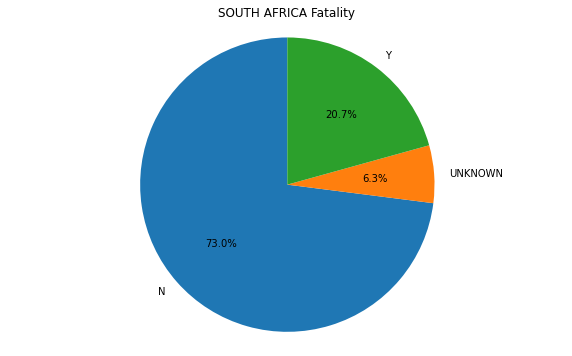

La probabilidad de que un ataque sea letal en AUSTRALIA es de 28.35% 

Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos


In [8]:
N_label_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts().index[0]
U_label_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts().index[2]
Y_label_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts().index[1]

N_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts()[0]
U_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts()[2]
Y_SA=sharks[sharks['Country']=='SOUTH AFRICA']['Fatal (y/n)'].value_counts()[1]

data = [N_SA, U_SA, Y_SA]
label = [N_label_SA, U_label_SA, Y_label_SA]

plt.figure(figsize=(10,6))
plt.pie(data, labels=label, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('SOUTH AFRICA Fatality')
plt.axis('equal')
plt.savefig("plots/SA_Fatality.jpg",bbox_inches='tight')
plt.show()

print(f'La probabilidad de que un ataque sea letal en AUSTRALIA es de {round(Y_SA/N_SA*100,2)}% \n')
print('Para el cálculo del porcentaje de letalidad no se tienen en cuenta los ataques desconocidos')

---------------------

`Hipótesis 3`

Partiendo de los tiburones que realizan `más ataques` ¿Cuáles son los más `letales`?

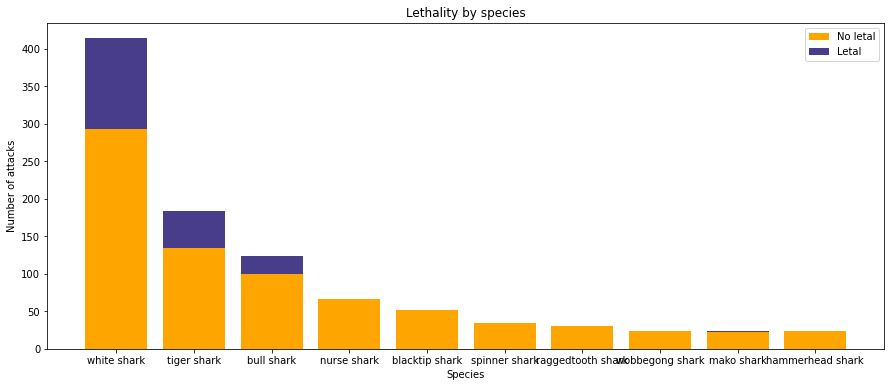

In [9]:
sharks_names=[]
for i in range(10):
    sharks_names.append(sharks[sharks['Species']!='not identified']['Species'].value_counts()[:10].index[i])

sharks_fatality_y=[]
sharks_fatality_n=[]

for i in sharks_names:
    sharks_fatality_y.append(sharks[(sharks['Species']!='not identified') & (sharks['Fatal (y/n)']=='Y') & (sharks['Species']==i) ]['Species'].count())
    sharks_fatality_n.append(sharks[(sharks['Species']!='not identified') & (sharks['Fatal (y/n)']=='N') & (sharks['Species']==i) ]['Species'].count())

plt.figure(figsize=(15,6))
plt.bar(sharks_names, sharks_fatality_n, color='orange',label='No letal')
plt.bar(sharks_names, sharks_fatality_y, bottom=sharks_fatality_n, color='darkslateblue',label='Letal')
plt.ylabel("Number of attacks")
plt.xlabel("Species")
plt.title('Lethality by species')
plt.legend()
plt.savefig("plots/Lethality_by_species.jpg",bbox_inches='tight')
plt.show()

-------------------------------

`Hipótesis 4`

Las actividades asociadas al mayor número de ataques son:
- Swimming
- Diving
- Surfing

Se han escogido estas actividades porque son aquellas en las cuales el ser humano se siente más expuesto/vulnerable, por eso se han escogido de mayor riesgo a menor riesgo.


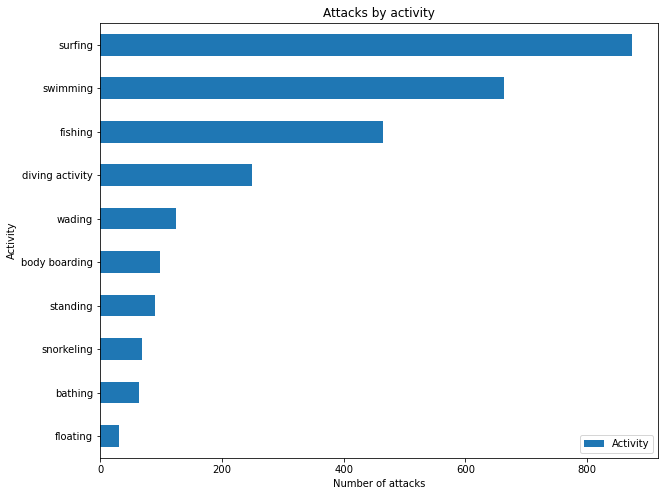

In [10]:
plt.figure(figsize=(10,8))
sharks[sharks['Activity']!='non common activity']['Activity'].value_counts().head(10).sort_values().plot(kind='barh')
plt.ylabel("Activity")
plt.xlabel("Number of attacks")
plt.title('Attacks by activity')
plt.legend()
plt.savefig("plots/Attacks_by_activity.jpg",bbox_inches='tight')
plt.show()

----------------

`Hipótesis 5`

Se considera que las lesiones `más letales` son aquellas que hieren partes de nuestro cuerpo donde se encuentran organos vitales como el torso o cara.

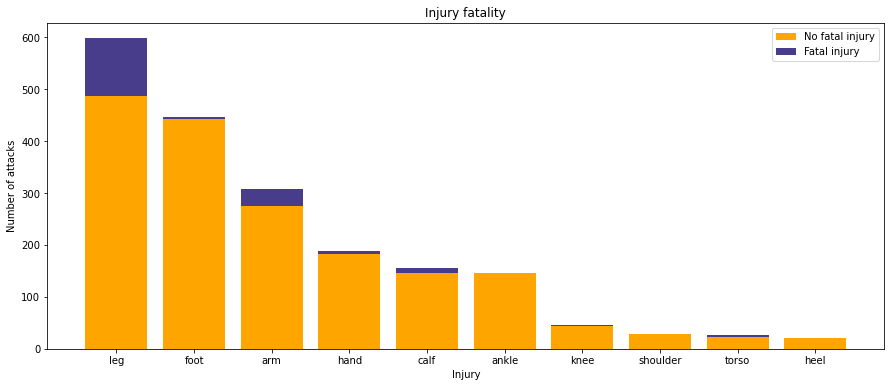

In [11]:
injuries=[]
for i in range(10):
    injuries.append(sharks[(sharks['Injury']!='not defined') & (sharks['Injury']!='no injury')]['Injury'].value_counts().index[i])

injury_fatality_y=[]
injury_fatality_n=[]

for i in injuries:
    injury_fatality_y.append(sharks[(sharks['Injury']!='not identified') & (sharks['Fatal (y/n)']=='Y') & (sharks['Injury']==i) ]['Injury'].count())
    injury_fatality_n.append(sharks[(sharks['Injury']!='not identified') & (sharks['Fatal (y/n)']=='N') & (sharks['Injury']==i) ]['Injury'].count())

plt.figure(figsize=(15,6))
plt.bar(injuries, injury_fatality_n, color='orange',label='No fatal injury')
plt.bar(injuries, injury_fatality_y, bottom=injury_fatality_n, color='darkslateblue',label='Fatal injury')
plt.ylabel("Number of attacks")
plt.xlabel("Injury")
plt.title('Injury fatality')
plt.legend()
plt.savefig("plots/Injury_fatality.jpg",bbox_inches='tight')
plt.show()